In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_openml

In [2]:
%ls airline.csv

airline.csv


In [3]:
air = np.loadtxt('airline.csv')

In [4]:
x = air[: ,0]
y = air[:, 1]
stop = 96

In [5]:
x.shape

(144,)

In [6]:
y.shape

(144,)

In [7]:
from sklearn import preprocessing
#import random

#random.seed(23)

#idx = random.sample(range(len(x)), 50)

x_new = (x - min(x))/(max(x)-min(x))

scaler = preprocessing.StandardScaler().fit(y.reshape(-1,1))

y_new = scaler.transform(y.reshape(-1,1))


#train_gx = x_new[idx][:,None]
#train_gy = y_new[idx] + 0.0001 * np.random.normal(0,1,50)[:,None]

train_x = x_new[:stop][:,None]
train_y = y_new[:stop]

test_x = x_new[stop:][:,None]
test_y = y_new[stop:]

In [8]:
train_x.shape, test_x.shape

((96, 1), (48, 1))

In [9]:
train_y.shape, test_y.shape

((96, 1), (48, 1))

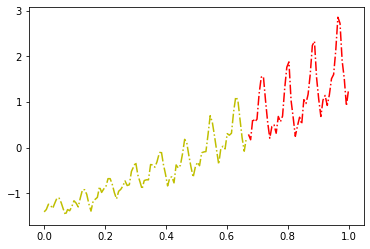

In [10]:
plt.plot(train_x,train_y, 'y-.')
plt.plot(test_x,test_y, 'r-.')

In [11]:
import GPy
from GPy.kern import Kern
from GPy import Param, Model

In [12]:
from deepRBF import deepRBF

d_rbf = deepRBF(input_dim=1,variance1=0.01,lengthscale=0.001)
m3 = GPy.models.GPRegression(train_x, train_y, d_rbf)
m3.optimize()
m3.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = 89.6363817416221
Optimization restart 2/20, f = 12.33005348554265
Optimization restart 3/20, f = -20.81380408132263
Optimization restart 4/20, f = 12.330051487638883
Optimization restart 5/20, f = 12.330051848961503
Optimization restart 6/20, f = 12.419988513090587
Optimization restart 7/20, f = 12.33005107435502
Optimization restart 8/20, f = 12.330051643125103
Optimization restart 9/20, f = 12.33006259531274
Optimization restart 10/20, f = 12.330434065698519
Optimization restart 11/20, f = -18.133877551438893
Optimization restart 12/20, f = 12.353042992366554
Optimization restart 13/20, f = 12.330051432525224
Optimization restart 14/20, f = 12.33009690390218
Optimization restart 15/20, f = 12.330050800936462
Optimization restart 16/20, f = 12.330049959757375
Optimization restart 17/20, f = 12.369555086212046
Optimization restart 18/20, f = 12.40717757589249
Optimization restart 19/20, f = 12.330050691400395
Optimization restart 20/20, f = 12.33004765615

In [13]:
X_test = np.linspace(0,1,199)[:,None]

mu, var = m3.predict(X_test)

X_plot = np.linspace(0,1,200)[:,None]

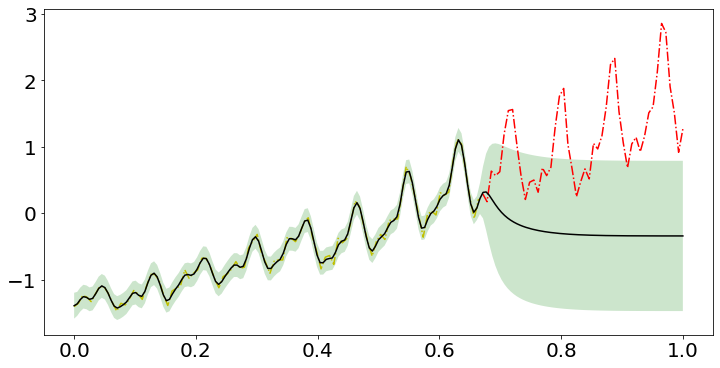

In [14]:
pred_up = mu + 1.96 * np.sqrt(var)
pred_down = mu - 1.96 * np.sqrt(var)

import matplotlib 

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r-.')
plt.plot(train_x,train_y,'y-.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu,'k-',linewidth=1.5)
#plt.title('SE[SE]')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up).flatten(),np.array(pred_down).flatten(),facecolor='g',alpha=0.2)

In [15]:
print(m3)


Name : GP regression
Objective : -20.81380408132263
Number of Parameters : 4
Number of Optimization Parameters : 4
Updates : True
Parameters:
  GP_regression.           |                 value  |  constraints  |  priors
  deep_rbf.variance1       |     4.291493358831717  |               |        
  deep_rbf.lengtscale      |   -0.0909460479331901  |               |        
  deep_rbf.variance2       |    0.6046732683844621  |               |        
  Gaussian_noise.variance  |  0.005331804375328347  |      +ve      |        


In [16]:
fig.savefig('demo_airline_sese.pdf', bbox_inches='tight')

In [17]:
kernel1 = GPy.kern.RBF(input_dim = 1,variance=1,lengthscale=0.01) 
kernel2 = GPy.kern.PeriodicExponential()

m1 = GPy.models.GPRegression(train_x, train_y, kernel1)
m1.optimize()
m1.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = 11.678667765362611
Optimization restart 2/20, f = 11.678667764850715
Optimization restart 3/20, f = 11.67866776478158
Optimization restart 4/20, f = 11.678667766228926
Optimization restart 5/20, f = 11.678667764778282
Optimization restart 6/20, f = 11.678667765047571
Optimization restart 7/20, f = 11.67866776624416
Optimization restart 8/20, f = 11.678667764758274
Optimization restart 9/20, f = 11.678667764777401
Optimization restart 10/20, f = 11.678667764886491
Optimization restart 11/20, f = 11.678667764781906
Optimization restart 12/20, f = 11.678667766855916
Optimization restart 13/20, f = 11.678667765554444
Optimization restart 14/20, f = 11.67866776496156
Optimization restart 15/20, f = 11.678667764785601
Optimization restart 16/20, f = 11.678667764754856
Optimization restart 17/20, f = 11.678667764803876
Optimization restart 18/20, f = 11.678667765367912
Optimization restart 19/20, f = 11.678667764770672
Optimization restart 20/20, f = 11.67866776

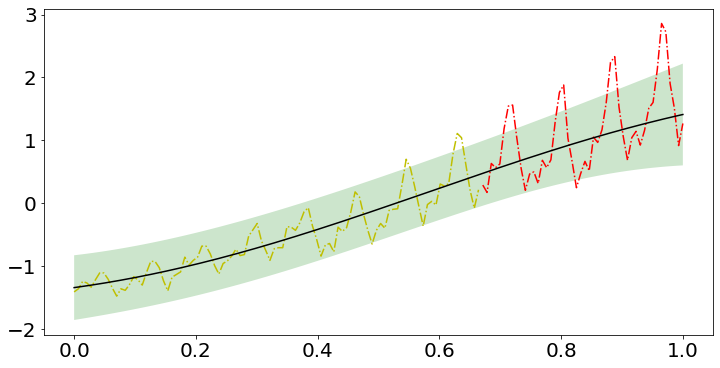

In [18]:
mu1, var1 = m1.predict(X_test)

pred_up1 = mu1 + 1.96 * np.sqrt(var1)
pred_down1 = mu1 - 1.96 * np.sqrt(var1)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r-.')
plt.plot(train_x,train_y,'y-.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu1,'k-',linewidth=1.5)
#plt.title('SE')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up1).flatten(),np.array(pred_down1).flatten(),facecolor='g',alpha=0.2)

In [19]:
print(m1)


Name : GP regression
Objective : 11.678667764754856
Number of Parameters : 3
Number of Optimization Parameters : 3
Updates : True
Parameters:
  GP_regression.           |                value  |  constraints  |  priors
  rbf.variance             |   2.5552928709307454  |      +ve      |        
  rbf.lengthscale          |   0.8057889895980027  |      +ve      |        
  Gaussian_noise.variance  |  0.06366130010021534  |      +ve      |        


In [20]:
fig.savefig('demo_airline_se.pdf', bbox_inches='tight')

In [21]:
kernel3 = GPy.kern.sde_RatQuad(input_dim=1)

model_book = GPy.models.GPRegression(train_x, train_y, kernel1+kernel2+kernel3)
model_book.optimize()
model_book.optimize_restarts(num_restarts = 20)

Optimization restart 1/20, f = -40.42198531624341
Optimization restart 2/20, f = -16.84781823525573
Optimization restart 3/20, f = 11.458863838008917
Optimization restart 4/20, f = -45.90657774042327
Optimization restart 5/20, f = -16.84363114253965
Optimization restart 6/20, f = -17.32502289135632
Optimization restart 7/20, f = -16.84768822596675


 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/rbf.py:52: RuntimeWarning:overflow encountered in square


Optimization restart 8/20, f = -26.549687327709066
Optimization restart 9/20, f = -7.695605709806671
Optimization restart 10/20, f = -16.84790456979141
Optimization restart 11/20, f = -5.54306965960761
Optimization restart 12/20, f = -17.325101926263706
Optimization restart 13/20, f = -3.971463754367683
Optimization restart 14/20, f = -26.875132442158872
Optimization restart 15/20, f = -17.32509549174901


 /Users/felix/anaconda3/lib/python3.6/site-packages/GPy/kern/src/stationary.py:690: RuntimeWarning:overflow encountered in square


Optimization restart 16/20, f = -6.548598023619661
Optimization restart 17/20, f = 11.678648356294389
Optimization restart 18/20, f = -23.69787597971932
Optimization restart 19/20, f = 11.678667888375323
Optimization restart 20/20, f = 11.638963039034891


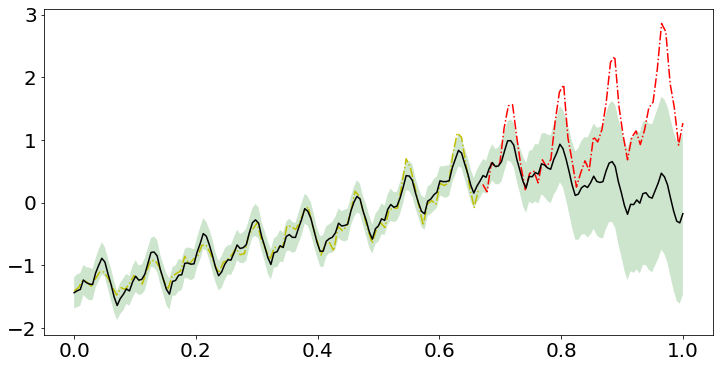

In [22]:
mu2, var2 = model_book.predict(X_test)

pred_up2 = mu2 + 1.96 * np.sqrt(var2)
pred_down2 = mu2 - 1.96 * np.sqrt(var2)

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(test_x,test_y,'r-.')
plt.plot(train_x,train_y,'y-.')
#plt.plot(X_plot,f_e,'r-.')
#plt.plot(X_plot,f_c,'b.')
plt.plot(X_test, mu2,'k-',linewidth=1.5)
#plt.title('SE+PeriodSE+RQ')
plt.fill_between(np.array(X_test).flatten(),np.array(pred_up2).flatten(),np.array(pred_down2).flatten(),facecolor='g',alpha=0.2)

In [23]:
print(model_book)


Name : GP regression
Objective : -45.90657774042327
Number of Parameters : 9
Number of Optimization Parameters : 9
Updates : True
Parameters:
  GP_regression.                        |                   value  |  constraints  |  priors
  sum.rbf.variance                      |      0.5193446750454931  |      +ve      |        
  sum.rbf.lengthscale                   |     0.20291205491711573  |      +ve      |        
  sum.periodic_exponential.variance     |       634.4839137573005  |      +ve      |        
  sum.periodic_exponential.lengthscale  |        1.59357344528048  |      +ve      |        
  sum.periodic_exponential.period       |     0.08371302699808439  |      +ve      |        
  sum.RatQuad.variance                  |   6.574316878546271e-76  |      +ve      |        
  sum.RatQuad.lengthscale               |      211.60652504212007  |      +ve      |        
  sum.RatQuad.power                     |  4.4897923237495463e-35  |      +ve      |        
  Gaussian_noise.var

In [50]:
fig.savefig('demo_airline_book.pdf', bbox_inches='tight')

In [51]:
model_book.log_likelihood()

81.9206489565703

In [52]:
m3.log_likelihood()

20.884569065401756

In [53]:
m1.log_likelihood()

-11.67866776475607